# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

> I am interested in exploring whether underlying health conditions have a potential connection to COVID-related deaths. By comparing these factors, we can identify states that may need to address specific health concerns. Early treatment of these preexisting conditions could reduce the risk of severe outcomes in future pandemics. The two data sets I will be looking at will be the NCHS - Leading Causes of Death: United States and the Conditions Contributing to COVID-19 Deaths by State and Age Provisional 2020-2023. Specifically we shall look at the state of Ohio for a simple analysis.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1: NCHS - Leading Causes of Death: United States**

Type: JSON

Method: The API method was used from Data.CDC.gov API, powered by Socrata. This was done as it was taught to use API over web scrapping when available and the second file will be of the download variety. 

Dataset variables:

* Year : The year that the cause of death occured.
* 113 Cause Name : The specific name of the cause of death.
* Cause Name : The broad category of the cause of death.
* State : The state where it (the deaths) occured.
* Deaths : The number of deaths that were from this specific cause of death. 
* Age-adjusted Death Rate : 

In [1]:
# This needs to be installed to use sodapy to help with the data conversion. Per recommendation of CDC website API Documentation
!pip install sodapy

In [41]:
# Imports - can be modified
#---------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Using the API Instructions from CDC.gov
#---------------------------------------------------------------------
# Unauthenticated client only works with public data sets.
client = Socrata("data.cdc.gov", None)

# First 2000 results, returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("bi63-dtpu", limit=10900)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
# Ensuring the data is being pulled correctly from the API
#---------------------------------------------------------------------
results_df.head(20)
#---------------------------------------------------------------------

,year,_113_cause_name,cause_name,state,deaths,aadr
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2017,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,29,3.3
2,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
3,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
4,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
5,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1
6,2009,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,29,4.4
7,2015,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,39,4.5
8,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,37,4.5
9,2011,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,South Dakota,49,4.5


In [5]:
# Saving the file locally after downloading from the API
#---------------------------------------------------------------------
# Establishing a file path:
api_file_path = 'API_File/API_Download.csv'

# Saving the file in CSV Format
results_df.to_csv(api_file_path, index=False)
#---------------------------------------------------------------------

In [6]:
# Ensuring the file saved correctly and can be loaded from a local source.
#---------------------------------------------------------------------
# Loading the data file 
df_api_deaths_raw = pd.read_csv(api_file_path)

# Printing a few lines to test that the files loaded correctly
df_api_deaths_raw.head()
#---------------------------------------------------------------------

,year,_113_cause_name,cause_name,state,deaths,aadr
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2017,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,29,3.3
2,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
3,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
4,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8


#### Data File 2: Conditions Contributing to COVID-19 Deaths by State and Age Provisional 2020-2023

Type: CSV File

Method: The data was downloaded from the website. Link: https://catalog.data.gov/dataset/conditions-contributing-to-deaths-involving-coronavirus-disease-2019-covid-19-by-age-group

Dataset variables:

* Data As Of : The date the information was recorded.
* Start Date : The starting date when the information was recoded.
* End Date : The ending date when the information was recoded.
* Group : The way the numbers reflect, either grouped by the total numbers or the month's numbers.
* Year : The year that coincides with the monthly grouping.
* Month : The month that coincides with the monthly grouping.
* State : Which state or province the data was recorded in.
* Condition Group	: Which broad condition group was affecting the patients.
* Condition : The specific condition(s) that was identified
* ICD10_codes	: International Statistical Classification of Diseases and Related Health Problems (ICD) classify and code causes of death.
* Age Group : The age group for the individuals.
* COVID-19 Deaths : Number of deaths related to COVID
* Number of Mentions : Number of times direct COVID Deaths were recorded (Not death by other conditions).
* Flag : Notice of suppressed counts according to NCHS Standards

In [7]:
# Downloading the file from the website and loading it
#---------------------------------------------------------------------
# Establishing the file path for the data file
conditions_file_path = 'Download_File/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv'

# Loading the data file 
df_conditions_raw = pd.read_csv(conditions_file_path)

# Printing a few lines to test that the files loaded correctly
df_conditions_raw.head()
#---------------------------------------------------------------------

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,9/24/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,9/24/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,9/24/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,9/24/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,9/24/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1 - df_conditions_raw Missing Values:

In [8]:
# Inspecting the dataframe visually
#---------------------------------------------------------------------
# Creating a random sample of the data to inspect.
df_conditions_raw.sample(10)
#---------------------------------------------------------------------

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
160281,9/24/2023,1/1/2023,1/31/2023,By Month,2023.0,1.0,District of Columbia,Circulatory diseases,Cerebrovascular diseases,I60-I69,25-34,0.0,0.0,NaN
170994,9/24/2023,4/1/2023,4/30/2023,By Month,2023.0,4.0,Florida,Circulatory diseases,Cerebrovascular diseases,I60-I69,All Ages,46.0,46.0,NaN
145442,9/24/2023,3/1/2020,3/31/2020,By Month,2020.0,3.0,Delaware,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,35-44,0.0,0.0,NaN
452067,9/24/2023,7/1/2023,7/31/2023,By Month,2023.0,7.0,Ohio,Diabetes,Diabetes,E10-E14,65-74,NaN,NaN,One or more data cells have counts between 1-9...
194235,9/24/2023,4/1/2021,4/30/2021,By Month,2021.0,4.0,Hawaii,Alzheimer disease,Alzheimer disease,G30,75-84,0.0,0.0,NaN
33518,9/24/2023,1/1/2022,12/31/2022,By Year,2022.0,NaN,Massachusetts,All other conditions and causes (residual),All other conditions and causes (residual),"A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F...",55-64,252.0,389.0,NaN
97381,9/24/2023,2/1/2020,2/29/2020,By Month,2020.0,2.0,Arizona,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",55-64,0.0,0.0,NaN
376478,9/24/2023,9/1/2020,9/30/2020,By Month,2020.0,9.0,New Hampshire,Circulatory diseases,Cardiac arrest,I46,75-84,0.0,0.0,NaN
432851,9/24/2023,6/1/2023,6/30/2023,By Month,2023.0,6.0,North Carolina,Vascular and unspecified dementia,Vascular and unspecified dementia,"F01, F03",Not stated,0.0,0.0,NaN
200642,9/24/2023,9/1/2022,9/30/2022,By Month,2022.0,9.0,Idaho,Circulatory diseases,Cardiac arrest,I46,Not stated,0.0,0.0,NaN


In [9]:
# Inspecting the dataframe programmatically
#---------------------------------------------------------------------
# Displaying the information of the dataset.
df_conditions_raw.info()
#---------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   Year                608580 non-null  float64
 5   Month               558900 non-null  float64
 6   State               621000 non-null  object 
 7   Condition Group     621000 non-null  object 
 8   Condition           621000 non-null  object 
 9   ICD10_codes         621000 non-null  object 
 10  Age Group           621000 non-null  object 
 11  COVID-19 Deaths     437551 non-null  float64
 12  Number of Mentions  443423 non-null  float64
 13  Flag                183449 non-null  object 
dtypes: float64(4), object(10)
memory usage: 66.3+ MB


Issue and justification: Multiple categories have different amounts of data inside of them, specifically the following columns Flag, Number of Mentions, COVID-19 Deaths, Month, and Year. This will cause issues in regards to data completeness and will need to be addressed to ensure that the data is complete for analysis.

### Quality Issue 2 - Year, Month, COVID-19 Deaths, Number of Mentions Columns Data Type:

In [10]:
# df_conditions_raw - Inspecting the dataframe visually
#---------------------------------------------------------------------
# Calling a random sample of the data.
df_conditions_raw.sample(10)
#---------------------------------------------------------------------

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
1894,9/24/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,Delaware,Respiratory diseases,Other diseases of the respiratory system,"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J...",55-64,34.0,35.0,NaN
532778,9/24/2023,12/1/2021,12/31/2021,By Month,2021.0,12.0,Texas,Circulatory diseases,Heart failure,I50,All Ages,143.0,143.0,NaN
150907,9/24/2023,11/1/2021,11/30/2021,By Month,2021.0,11.0,Delaware,Sepsis,Sepsis,A40-A41,45-54,0.0,0.0,NaN
99303,9/24/2023,10/1/2022,10/31/2022,By Month,2022.0,10.0,Arizona,Sepsis,Sepsis,A40-A41,75-84,0.0,0.0,NaN
267713,9/24/2023,9/1/2020,9/30/2020,By Month,2020.0,9.0,Louisiana,Renal failure,Renal failure,N17-N19,All Ages,24.0,26.0,NaN
14554,9/24/2023,1/1/2022,12/31/2022,By Year,2022.0,NaN,Alaska,Circulatory diseases,Ischemic heart disease,I20-I25,45-54,NaN,NaN,One or more data cells have counts between 1-9...
200454,9/24/2023,1/1/2022,1/31/2022,By Month,2022.0,1.0,Idaho,Circulatory diseases,Cardiac arrest,I46,55-64,NaN,NaN,One or more data cells have counts between 1-9...
185063,9/24/2023,12/1/2021,12/31/2021,By Month,2021.0,12.0,Georgia,"Intentional and unintentional injury, poisonin...","Intentional and unintentional injury, poisonin...","S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y...",35-44,NaN,NaN,One or more data cells have counts between 1-9...
346274,9/24/2023,9/1/2023,9/23/2023,By Month,2023.0,9.0,Montana,Circulatory diseases,Heart failure,I50,55-64,0.0,0.0,NaN
380512,9/24/2023,2/1/2023,2/28/2023,By Month,2023.0,2.0,New Hampshire,Alzheimer disease,Alzheimer disease,G30,65-74,NaN,NaN,One or more data cells have counts between 1-9...


In [11]:
# df_api_deaths_raw - Inspecting the dataframe visually
#---------------------------------------------------------------------
# Calling a random sample of the data.
df_api_deaths_raw.sample(10)
#---------------------------------------------------------------------

,year,_113_cause_name,cause_name,state,deaths,aadr
6521,2012,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Ohio,5420,44.7
10133,2017,All Causes,All causes,District of Columbia,4965,725.4
707,2002,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Wisconsin,627,11.3
9213,2002,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,New Mexico,3360,196.4
3562,2000,Alzheimer's disease (G30),Alzheimer's disease,Montana,219,22.4
9532,1999,Malignant neoplasms (C00-C97),Cancer,Ohio,25233,215.4
5580,2010,Alzheimer's disease (G30),Alzheimer's disease,North Dakota,361,37.2
10699,1999,All Causes,All causes,Illinois,108436,905.1
10478,2013,All Causes,All causes,Ohio,113258,811.2
9098,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,West Virginia,4727,191.3


In [12]:
# df_conditions_raw - Inspecting the dataframe programmatically
#---------------------------------------------------------------------
# Inspecting the data types of the file.
df_conditions_raw.dtypes
#---------------------------------------------------------------------

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object

In [13]:
# df_api_deaths_raw - Inspecting the dataframe programmatically
#---------------------------------------------------------------------
# Inspecting the data types of the file.
df_api_deaths_raw.info()
#---------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             10868 non-null  int64  
 1   _113_cause_name  10868 non-null  object 
 2   cause_name       10868 non-null  object 
 3   state            10868 non-null  object 
 4   deaths           10868 non-null  int64  
 5   aadr             10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


Issue and justification: The Month, Year, COVID-19 Deaths, and Number of Mentions categories in df_conditions_raw are listed as float64 values rather than integer values, this will need to be changed to reflect the proper variables for consistency between the two files. We cannot have two different data files with two different standards of format for the same variables. ALong with this, you cannot have a half death reported for this data, so the other variables need to be converted to Integers.

### Tidiness Issue 1 - 113_cause_name Column:

In [14]:
# df_api_deaths_raw - Inspecting the dataframe visually
#---------------------------------------------------------------------
# Calling a random sample of the data.
df_api_deaths_raw.sample(10)
#---------------------------------------------------------------------

,year,_113_cause_name,cause_name,state,deaths,aadr
7772,2001,Cerebrovascular diseases (I60-I69),Stroke,Indiana,3877,64.3
1217,2000,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Nebraska,254,13.3
8552,2004,Malignant neoplasms (C00-C97),Cancer,California,53700,169.2
4735,2005,Alzheimer's disease (G30),Alzheimer's disease,Colorado,1064,29.5
8329,2014,Malignant neoplasms (C00-C97),Cancer,Nebraska,3459,159.6
5777,2007,Chronic lower respiratory diseases (J40-J47),CLRD,Wisconsin,2399,38.6
8979,2002,Malignant neoplasms (C00-C97),Cancer,Connecticut,7163,186.3
4596,2002,Diabetes mellitus (E10-E14),Diabetes,Oregon,1041,28.2
9525,2003,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Kansas,6491,214.7
4893,2017,Alzheimer's disease (G30),Alzheimer's disease,United States,121404,31.0


In [15]:
# df_api_deaths_raw - Inspecting the dataframe programmatically
#---------------------------------------------------------------------
# Inspecting the data types of the file.
df_api_deaths_raw.info()
#---------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             10868 non-null  int64  
 1   _113_cause_name  10868 non-null  object 
 2   cause_name       10868 non-null  object 
 3   state            10868 non-null  object 
 4   deaths           10868 non-null  int64  
 5   aadr             10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


Issue and justification: The issue that has been identified in this dataset is that the '113_cause_name' column's entry is two different variables combined together. This would need to be either be seperated into seperate columns (Cause Name, ICD10_codes) or the column needs to be dropped from the analysis.

### Tidiness Issue 2 - Data Redundancy: 

In [16]:
# df_conditions_raw - Inspecting the dataframe visually
#---------------------------------------------------------------------
# Calling a random sample of the data.
df_conditions_raw.sample(10)
#---------------------------------------------------------------------

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
554015,9/24/2023,9/1/2021,9/30/2021,By Month,2021.0,9.0,Vermont,Circulatory diseases,Other diseases of the circulatory system,"I00-I09, I26-I43, I51, I52, I70-I99",25-34,0.0,0.0,NaN
441725,9/24/2023,6/1/2020,6/30/2020,By Month,2020.0,6.0,North Dakota,Diabetes,Diabetes,E10-E14,75-84,0.0,0.0,NaN
64514,9/24/2023,6/1/2022,6/30/2022,By Month,2022.0,6.0,United States,Respiratory diseases,Other diseases of the respiratory system,"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J...",45-54,28.0,30.0,NaN
620761,9/24/2023,8/1/2022,8/31/2022,By Month,2022.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,55-64,24.0,24.0,NaN
231350,9/24/2023,6/1/2020,6/30/2020,By Month,2020.0,6.0,Iowa,Circulatory diseases,Cardiac arrest,I46,25-34,0.0,0.0,NaN
594008,9/24/2023,9/1/2020,9/30/2020,By Month,2020.0,9.0,Wisconsin,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",0-24,0.0,0.0,NaN
437278,9/24/2023,2/1/2021,2/28/2021,By Month,2021.0,2.0,North Dakota,Respiratory diseases,Other diseases of the respiratory system,"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J...",85+,0.0,0.0,NaN
1959,9/24/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,Delaware,Circulatory diseases,Cerebrovascular diseases,I60-I69,All Ages,234.0,239.0,NaN
179799,9/24/2023,1/1/2022,1/31/2022,By Month,2022.0,1.0,Georgia,Circulatory diseases,Cardiac arrest,I46,65-74,110.0,110.0,NaN
113074,9/24/2023,11/1/2022,11/30/2022,By Month,2022.0,11.0,Arkansas,All other conditions and causes (residual),All other conditions and causes (residual),"A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F...",35-44,NaN,NaN,One or more data cells have counts between 1-9...


In [17]:
# df_conditions_raw - Inspecting the dataframe programmatically
#---------------------------------------------------------------------
# Inspecting the data types of the file.
df_conditions_raw.info()
#---------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   Year                608580 non-null  float64
 5   Month               558900 non-null  float64
 6   State               621000 non-null  object 
 7   Condition Group     621000 non-null  object 
 8   Condition           621000 non-null  object 
 9   ICD10_codes         621000 non-null  object 
 10  Age Group           621000 non-null  object 
 11  COVID-19 Deaths     437551 non-null  float64
 12  Number of Mentions  443423 non-null  float64
 13  Flag                183449 non-null  object 
dtypes: float64(4), object(10)
memory usage: 66.3+ MB


Issue and justification: The issue identified here is the redundancy of the columns "Data as of", "Start Date", and "End Date". Since we already have the month column we do not need these additional columns as they add confusion to the data for our analysis.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [18]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes are not impacted
#---------------------------------------------------------------------
# Creation of a copy file for the df_conditions_raw file.
df_conditions_raw.to_csv('Raw_Dataset_Copies/Exact_Copies/df_copy_conditions_raw.csv', index=False, encoding="utf-8")

# Creation of a copy file for the df_api_deaths_raw file.
df_api_deaths_raw.to_csv('Raw_Dataset_Copies/Exact_Copies/df_copy_api_deaths_raw.csv', index=False, encoding="utf-8")
#---------------------------------------------------------------------

In [19]:
# File Paths for the copied data sets
#---------------------------------------------------------------------
copy_conditions_raw_filepath = 'Raw_Dataset_Copies/Exact_Copies/df_copy_conditions_raw.csv'
copy_api_raw_filepath = 'Raw_Dataset_Copies/Exact_Copies/df_copy_api_deaths_raw.csv'
# Loading the Conditions File.
df_copy_conditions = pd.read_csv(copy_conditions_raw_filepath)
# Loading the API File.
df_copy_api = pd.read_csv(copy_api_raw_filepath)
#---------------------------------------------------------------------

In [20]:
# Trimming the data files to only include Ohio records
#---------------------------------------------------------------------
df_raw_conditions_ohio = df_copy_conditions[df_copy_conditions['State'] == 'Ohio']
df_raw_api_ohio = df_copy_api[df_copy_api['state'] == 'Ohio']
#---------------------------------------------------------------------
# Save the filtered DataFrames
#---------------------------------------------------------------------
df_raw_conditions_ohio.to_csv('Raw_Dataset_Copies/df_raw_filtered_conditions_ohio.csv', index=False)
df_raw_api_ohio.to_csv('Raw_Dataset_Copies/df_raw_filtered_api_ohio.csv', index=False)
#---------------------------------------------------------------------
# Display the headers of both files to ensure Ohio is the correct state selected.
df_raw_conditions_ohio.head(), df_raw_api_ohio.head()
#---------------------------------------------------------------------

(     Data As Of Start Date   End Date     Group  Year  Month State  \
 8510  9/24/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  Ohio   
 8511  9/24/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  Ohio   
 8512  9/24/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  Ohio   
 8513  9/24/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  Ohio   
 8514  9/24/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  Ohio   
 
            Condition Group                Condition ICD10_codes Age Group  \
 8510  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
 8511  Respiratory diseases  Influenza and pneumonia     J09-J18     25-34   
 8512  Respiratory diseases  Influenza and pneumonia     J09-J18     35-44   
 8513  Respiratory diseases  Influenza and pneumonia     J09-J18     45-54   
 8514  Respiratory diseases  Influenza and pneumonia     J09-J18     55-64   
 
       COVID-19 Deaths  Number of Mentions Flag  
 8510             51.0                52.0  NaN  
 8

In [21]:
df_raw_conditions_ohio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, 8510 to 455399
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data As Of          11500 non-null  object 
 1   Start Date          11500 non-null  object 
 2   End Date            11500 non-null  object 
 3   Group               11500 non-null  object 
 4   Year                11270 non-null  float64
 5   Month               10350 non-null  float64
 6   State               11500 non-null  object 
 7   Condition Group     11500 non-null  object 
 8   Condition           11500 non-null  object 
 9   ICD10_codes         11500 non-null  object 
 10  Age Group           11500 non-null  object 
 11  COVID-19 Deaths     8394 non-null   float64
 12  Number of Mentions  8521 non-null   float64
 13  Flag                3106 non-null   object 
dtypes: float64(4), object(10)
memory usage: 1.3+ MB


In [22]:
df_raw_api_ohio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 333 to 10758
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             209 non-null    int64  
 1   _113_cause_name  209 non-null    object 
 2   cause_name       209 non-null    object 
 3   state            209 non-null    object 
 4   deaths           209 non-null    int64  
 5   aadr             209 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.4+ KB


### **Quality Issue 1: df_conditions_raw Missing Values**

In [23]:
# FILL IN - Apply the cleaning strategy
#---------------------------------------------------------------------
# Selecting data only with the variables All Ages and By Year in their respective columns.
df_raw_conditions_ohio = df_raw_conditions_ohio[(df_raw_conditions_ohio['Age Group'] == 'All Ages') & (df_raw_conditions_ohio['Group'] == 'By Year')]
#---------------------------------------------------------------------

In [24]:
#---------------------------------------------------------------------
# Saving the file in a new location to preserve other steps for easy mistake fixing.
df_raw_conditions_ohio.to_csv('Raw_Dataset_Copies/Quality_Issue_1/df_raw_q1_filtered_conditions_ohio.csv', index=False)
#---------------------------------------------------------------------

In [25]:
# FILL IN - Validate the cleaning was successful
#---------------------------------------------------------------------
# Loading in the new testing file to confirm the quality issue was fixed.
df_raw_q1_test_conditions_ohio = pd.read_csv('Raw_Dataset_Copies/Quality_Issue_1/df_raw_q1_filtered_conditions_ohio.csv')

df_raw_q1_test_conditions_ohio.head(25)
#---------------------------------------------------------------------

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,9/24/2023,1/1/2020,12/31/2020,By Year,2020.0,NaN,Ohio,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,6180.0,6287.0,NaN
1,9/24/2023,1/1/2021,12/31/2021,By Year,2021.0,NaN,Ohio,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,10744.0,11049.0,NaN
2,9/24/2023,1/1/2022,12/31/2022,By Year,2022.0,NaN,Ohio,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,4854.0,5047.0,NaN
3,9/24/2023,1/1/2023,9/23/2023,By Year,2023.0,NaN,Ohio,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,599.0,626.0,NaN
4,9/24/2023,1/1/2020,12/31/2020,By Year,2020.0,NaN,Ohio,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,1329.0,1366.0,NaN
5,9/24/2023,1/1/2021,12/31/2021,By Year,2021.0,NaN,Ohio,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,1720.0,1785.0,NaN
6,9/24/2023,1/1/2022,12/31/2022,By Year,2022.0,NaN,Ohio,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,1496.0,1549.0,NaN
7,9/24/2023,1/1/2023,9/23/2023,By Year,2023.0,NaN,Ohio,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,337.0,352.0,NaN
8,9/24/2023,1/1/2020,12/31/2020,By Year,2020.0,NaN,Ohio,Respiratory diseases,Adult respiratory distress syndrome,J80,All Ages,1467.0,1467.0,NaN
9,9/24/2023,1/1/2021,12/31/2021,By Year,2021.0,NaN,Ohio,Respiratory diseases,Adult respiratory distress syndrome,J80,All Ages,2025.0,2025.0,NaN


In [26]:
df_raw_q1_test_conditions_ohio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data As Of          92 non-null     object 
 1   Start Date          92 non-null     object 
 2   End Date            92 non-null     object 
 3   Group               92 non-null     object 
 4   Year                92 non-null     float64
 5   Month               0 non-null      float64
 6   State               92 non-null     object 
 7   Condition Group     92 non-null     object 
 8   Condition           92 non-null     object 
 9   ICD10_codes         92 non-null     object 
 10  Age Group           92 non-null     object 
 11  COVID-19 Deaths     92 non-null     float64
 12  Number of Mentions  92 non-null     float64
 13  Flag                0 non-null      float64
dtypes: float64(5), object(9)
memory usage: 10.2+ KB


Justification: We filtered the data to include only records categorized as "All ages," sorted by years, to eliminate entries with missing values. Initially, 150 records had missing data across various categories, making it impractical to fill these gaps with the mean, as they spanned multiple age groups. By narrowing our focus to a single category (all ages), we simplified the analysis and avoided issues related to incomplete data across multiple age groups.

### **Quality Issue 2: Year, Month, COVID-19 Deaths, Number of Mentions Columns Data Type**

In [27]:
#FILL IN - Apply the cleaning strategy
#---------------------------------------------------------------------
# Converting the columns to a different data type.
columns_to_convert = ['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']

# Filling missing values with 0's. Both columns that will be filled will be dropped in a later step for tidyness.
df_raw_q1_test_conditions_ohio[columns_to_convert] = df_raw_q1_test_conditions_ohio[columns_to_convert].fillna(0)

# Converting the data types to Int
df_raw_q1_test_conditions_ohio[columns_to_convert] = df_raw_q1_test_conditions_ohio[columns_to_convert].astype(int)

#---------------------------------------------------------------------
# Saving the file in a new location to preserve other steps for easy mistake fixing.
df_raw_q1_test_conditions_ohio.to_csv('Raw_Dataset_Copies/Quality_Issue_2/df_raw_q2_filtered_conditions_ohio.csv', index=False)
#---------------------------------------------------------------------

In [28]:
#FILL IN - Validate the cleaning was successful
#---------------------------------------------------------------------
# Loading in the new testing file to confirm the quality issue was fixed.
df_raw_q2_test_conditions_ohio = pd.read_csv('Raw_Dataset_Copies/Quality_Issue_2/df_raw_q2_filtered_conditions_ohio.csv')

df_raw_q2_test_conditions_ohio.info()
#---------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data As Of          92 non-null     object 
 1   Start Date          92 non-null     object 
 2   End Date            92 non-null     object 
 3   Group               92 non-null     object 
 4   Year                92 non-null     int64  
 5   Month               92 non-null     int64  
 6   State               92 non-null     object 
 7   Condition Group     92 non-null     object 
 8   Condition           92 non-null     object 
 9   ICD10_codes         92 non-null     object 
 10  Age Group           92 non-null     object 
 11  COVID-19 Deaths     92 non-null     int64  
 12  Number of Mentions  92 non-null     int64  
 13  Flag                0 non-null      float64
dtypes: float64(1), int64(4), object(9)
memory usage: 10.2+ KB


Justification: We converted the data types to integers to ensure consistency with the other file, facilitating a smooth combination of the datasets. Additionally, for this analysis, both the COVID-19 Deaths and Number of Mentions needed to be represented as whole numbers, as fractional values (e.g., half a death) are not meaningful in this context.

### **Tidiness Issue 1: 113_cause_name Column**

In [29]:
#---------------------------------------------------------------------
# Saving the file in a new location to preserve other steps for easy mistake fixing.
df_raw_api_ohio.to_csv('Raw_Dataset_Copies/Tidiness_Issue_1/df_raw_t1_test_api_ohio.csv', index=False)
#---------------------------------------------------------------------
# Reading in this file for editing purposes.
df_raw_t1_test_api_ohio = pd.read_csv('Raw_Dataset_Copies/Tidiness_Issue_1/df_raw_t1_test_api_ohio.csv')
#---------------------------------------------------------------------

In [30]:
#FILL IN - Apply the cleaning strategy
#---------------------------------------------------------------------
# List of columns to remove.
api_columns_to_remove = ['_113_cause_name', 'aadr']

# Removal of the unecessary columns from the file.
df_raw_t1_test_api_ohio.drop(columns=api_columns_to_remove, inplace=True)
#---------------------------------------------------------------------
# Reordering the columns to flow better for readability.
reordering = ['year', 'state', 'cause_name', 'deaths']
df_raw_t1_test_api_ohio = df_raw_t1_test_api_ohio[reordering]
#---------------------------------------------------------------------
# Renaming the colums for consistency.
api_column_renames = {
    'year': 'Year',
    'state': 'State',
    'cause_name': 'Cause_Name',
    'deaths': 'Deaths'
}

df_raw_t1_test_api_ohio = df_raw_t1_test_api_ohio.rename(columns=api_column_renames)
#---------------------------------------------------------------------
# Saving the changes to the file.
df_raw_t1_test_api_ohio.to_csv('Raw_Dataset_Copies/Tidiness_Issue_1/df_raw_t1_test_api_ohio.csv', index=False)

In [31]:
#FILL IN - Validate the cleaning was successful
df_raw_t1_test_api_ohio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        209 non-null    int64 
 1   State       209 non-null    object
 2   Cause_Name  209 non-null    object
 3   Deaths      209 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.7+ KB


Justification: We reorganized and renamed the columns to establish consistency, ensuring smooth integration when merging multiple files. Additionally, we removed any columns that were unnecessary or irrelevant for our analysis. Specifically, the '113_cause_name' column, which contained enough detail to potentially be split into two distinct columns, was excluded to streamline the analysis and keep it more straightforward.

### **Tidiness Issue 2: Data Redundancy Removal**

In [32]:
#FILL IN - Apply the cleaning strategy
df_raw_q2_test_conditions_ohio.to_csv('Raw_Dataset_Copies/Tidiness_Issue_2/df_raw_t2_test_conditions_ohio.csv', index=False)
#---------------------------------------------------------------------
# Reading in this file for editing purposes.
df_raw_t2_test_conditions_ohio = pd.read_csv('Raw_Dataset_Copies/Tidiness_Issue_2/df_raw_t2_test_conditions_ohio.csv')
#---------------------------------------------------------------------

In [33]:
#---------------------------------------------------------------------
# List of columns to remove.
conditions_columns_to_remove = ['Data As Of', 'Start Date', 'End Date', 'Month', 'Condition Group', 'ICD10_codes', 'Flag']

# Removal of the unecessary columns from the file.
df_raw_t2_test_conditions_ohio.drop(columns=conditions_columns_to_remove, inplace=True)
#---------------------------------------------------------------------
# Renaming the colums for consistency.
conditions_column_renames = {
    'Group': 'Group',
    'Year' : 'Year',
    'State': 'State',
    'Condition' : 'Condition',
    'Age Group' : 'Age_Group',
    'COVID-19 Deaths': 'COVID-19_Deaths',
    'Number of Mentions' : 'Number_of_Mentions'
}

df_raw_t2_test_conditions_ohio = df_raw_t2_test_conditions_ohio.rename(columns=conditions_column_renames)
#---------------------------------------------------------------------
# Reordering the columns to flow better for readability.
reordering = ['Year', 'State', 'Group', 'Condition', 'Age_Group', 'COVID-19_Deaths', 'Number_of_Mentions' ]
df_raw_t2_test_conditions_ohio = df_raw_t2_test_conditions_ohio[reordering]
#---------------------------------------------------------------------
df_raw_t2_test_conditions_ohio.to_csv('Raw_Dataset_Copies/Tidiness_Issue_2/df_raw_t2_test_conditions_ohio.csv', index=False)

In [34]:
#FILL IN - Validate the cleaning was successful
df_raw_t2_test_conditions_ohio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                92 non-null     int64 
 1   State               92 non-null     object
 2   Group               92 non-null     object
 3   Condition           92 non-null     object
 4   Age_Group           92 non-null     object
 5   COVID-19_Deaths     92 non-null     int64 
 6   Number_of_Mentions  92 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 5.2+ KB


Justification: For this analysis, we removed any columns not relevant to the current scope and that created redundancy. Additionally, we renamed and reordered the remaining columns to maintain consistency and uniformity across the dataset.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [35]:
# Saving the files in a new folder for combining purposes.
#---------------------------------------------------------------------
df_raw_t2_test_conditions_ohio.to_csv('Raw_Dataset_Copies/Raw_Combination_Files/df_raw_combination_conditions_ohio.csv', index=False)
#---------------------------------------------------------------------
df_raw_t1_test_api_ohio.to_csv('Raw_Dataset_Copies/Raw_Combination_Files/df_raw_combination_api_ohio.csv', index=False)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [40]:
df_raw_combination_api_ohio = pd.read_csv('Raw_Dataset_Copies/Raw_Combination_Files/df_raw_combination_api_ohio.csv')

df_raw_combination_conditions_ohio = pd.read_csv('Raw_Dataset_Copies/Raw_Combination_Files/df_raw_combination_conditions_ohio.csv')

# Replace 'common_column' with the actual column name both files share
combined_df = pd.merge(df_raw_combination_api_ohio, df_raw_combination_conditions_ohio, on=['Year', 'State'], how='outer')

combined_df.head()

combined_df.to_csv('Merged_Dataset/API_Download_Merged_File.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [43]:
merged_data_filepath = 'Merged_Dataset/API_Download_Merged_File.csv'

cleaned_datafile = pd.read_csv(merged_data_filepath)

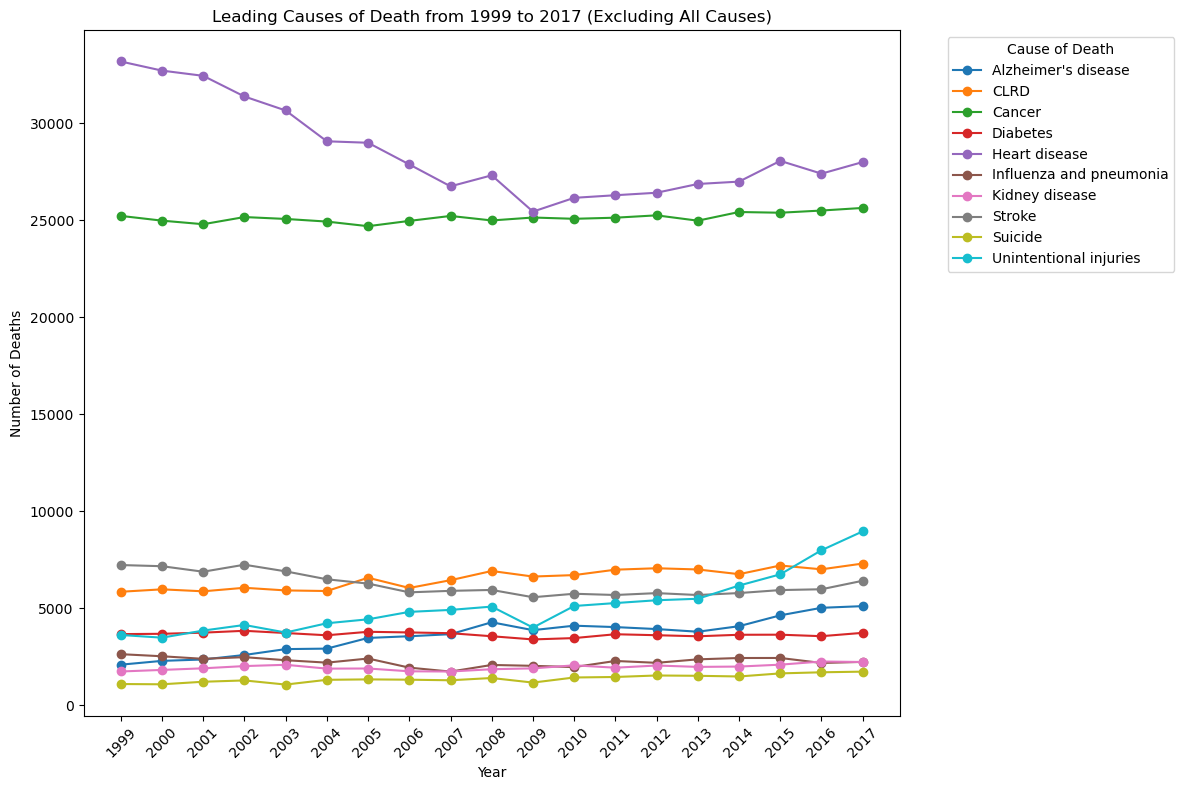

In [46]:
# Filter the data to include only the years 1999 to 2017 and exclude "All Causes".
filtered_data_1999_2017 = cleaned_datafile[(cleaned_datafile['Year'].between(1999, 2017)) & (~cleaned_datafile['Cause_Name'].str.contains('All Causes', case=False, na=False))]

# Group by Year and Cause_Name to get the total deaths for each cause per year.
leading_causes_trend = filtered_data_1999_2017.groupby(['Year', 'Cause_Name'])['Deaths'].sum().unstack().fillna(0)

# Re-plot the trend with integer years on the x-axis for clarity.
plt.figure(figsize=(12, 8))
leading_causes_trend.plot(kind='line', marker='o', ax=plt.gca())

# Refine the x-axis to show only whole numbers for each year.
plt.xticks(leading_causes_trend.index, rotation=45)  # Use the index (years) as ticks.

plt.title('Leading Causes of Death from 1999 to 2017 (Excluding All Causes)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

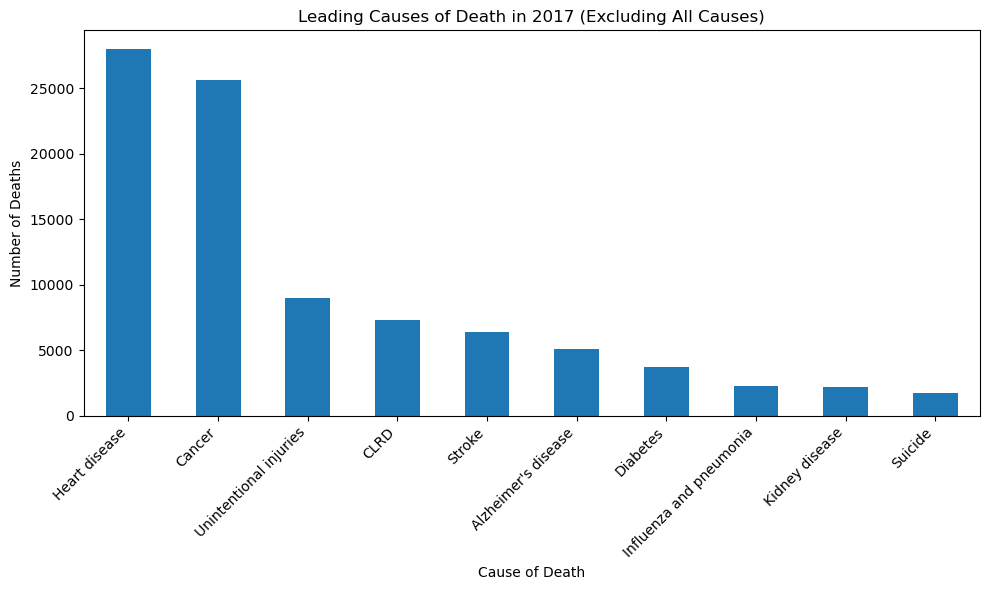

In [44]:
# Filter the data more explicitly to exclude rows where 'Cause_Name' is 'All Causes'.
filtered_data_2017 = cleaned_datafile[(cleaned_datafile['Year'] == 2017) & (~cleaned_datafile['Cause_Name'].str.contains('All Causes', case=False, na=False))]

# Group by Cause_Name to get the total deaths for each cause in 2017, excluding 'All Causes'.
leading_causes_2017 = filtered_data_2017.groupby('Cause_Name')['Deaths'].sum().sort_values(ascending=False)

# Plot the leading causes of death for 2017.
plt.figure(figsize=(10, 6))
leading_causes_2017.plot(kind='bar')
plt.title('Leading Causes of Death in 2017 (Excluding All Causes)')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

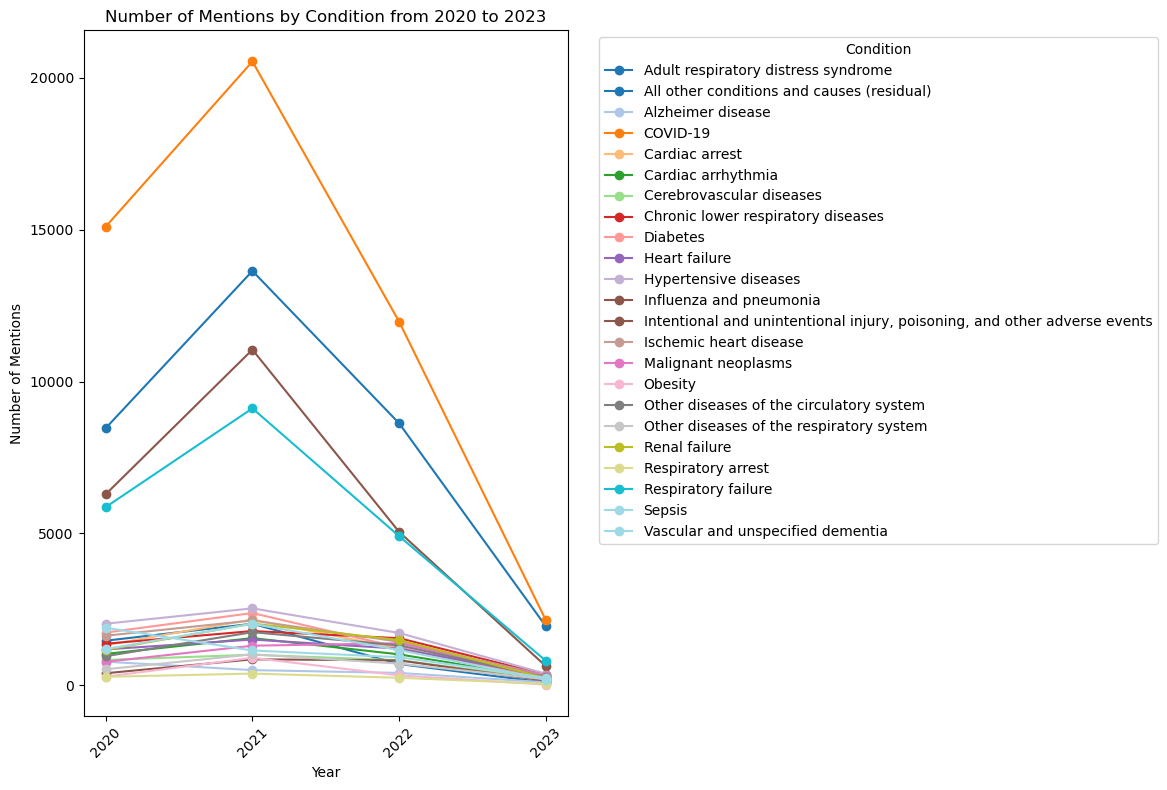

In [48]:
# Group by Year and Condition to get the total Number of Mentions for each condition per year (2020-2023)
mentions_condition_trend = cleaned_datafile.groupby(['Year', 'Condition'])['Number_of_Mentions'].sum().unstack().fillna(0)

# Plot the trend of Number of Mentions by condition from 2020 to 2023
plt.figure(figsize=(12, 8))
mentions_condition_trend.plot(kind='line', marker='o', ax=plt.gca(), colormap='tab20')

# Refine the x-axis to show only whole numbers for each year
plt.xticks(mentions_condition_trend.index, rotation=45)

plt.title('Number of Mentions by Condition from 2020 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*Answer to research question:* Using these visualizations, we can examine the leading causes of death in Ohio in the years preceding 2017. Specifically, in 2017, heart disease was the leading cause of death for Ohioans, closely followed by cancer. With this context, we can now assess deaths in the COVID-19 era, where individuals with preexisting conditions faced heightened risks.

From 2020 to 2023, the conditions most frequently mentioned in relation to COVID-19 deaths were:

COVID-19: 49,740 mentions
All other conditions and causes (residual): 32,664 mentions
Influenza and pneumonia: 23,009 mentions
Respiratory failure: 20,690 mentions
Hypertensive diseases: 6,657 mentions
Diabetes: 5,586 mentions
Ischemic heart disease: 5,526 mentions
Chronic lower respiratory diseases: 5,052 mentions
Renal failure: 4,922 mentions
Cardiac arrest: 4,873 mentions

Although COVID-19 had the highest direct death toll, many other preexisting conditions quickly added to the total mortality. These conditions, exacerbated by COVID-19, underscore how underlying health issues contributed to fatal outcomes, highlighting the virus’s role in amplifying the impact of chronic diseases.

This analysis suggests that early interventions, public health campaigns, and preventive measures focused on high-risk conditions—particularly respiratory and cardiovascular diseases—could mitigate severe outcomes in future pandemics. Understanding and managing specific health conditions may play a crucial role in reducing the severity of outcomes during health crises. Data on mortality and condition mentions also provide valuable insights to guide public health priorities and allocate resources effectively.

However, there are a few important caveats to consider when interpreting this data:

Overlapping and Secondary Conditions:
> Many of the listed conditions, such as respiratory failure and cardiac arrest, are often complications of other underlying health issues. This overlap suggests that some mentions may reflect secondary conditions rather than primary illnesses, complicating efforts to isolate direct causal factors for COVID-19 deaths.

Potential Gaps and Inconsistencies in Early COVID-19 Data:
> Data from early 2020 may have gaps due to the initial overwhelming impact of COVID-19 on healthcare systems and reporting mechanisms. This could lead to underreporting or inconsistencies, especially for COVID-19-related deaths and condition mentions. As the pandemic evolved, coding practices and reporting standards also shifted, affecting data comparability across years.

Evolution of Medical Treatments and COVID-19 Response:
> Between 2020 and 2023, medical understanding of COVID-19 and treatment options improved significantly. Advancements in treatments and vaccines likely influenced outcomes, particularly in later years, potentially confounding the relationship between certain conditions and COVID-19 mortality.

These considerations are crucial to keep in mind when drawing conclusions from this data, as they highlight the need for further research and more granular data to better understand the factors influencing COVID-19 outcomes. These insights could help inform strategies for managing future pandemics, with an emphasis on addressing and monitoring high-risk health conditions.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* Given more time, I would invest additional effort into refining this project. One key improvement would be to address the issue of overlapping condition types by organizing the data using ICD (International Classification of Diseases) codes. Sorting the data by ICD codes would allow us to categorize conditions into broader health areas, such as respiratory, cardiovascular, or metabolic diseases, providing a clearer focus on the major health concerns. This categorization could help target specific areas for intervention, potentially minimizing the impact of a future pandemic by addressing these critical health vulnerabilities.